<a href="https://colab.research.google.com/github/srivalli0305/FMML_ASSIGNMENTS/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [17]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [18]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [19]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

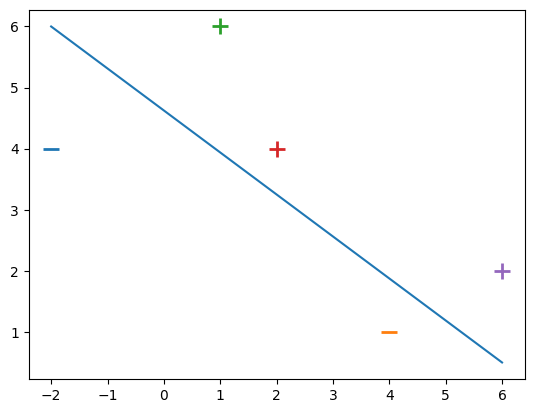

In [20]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

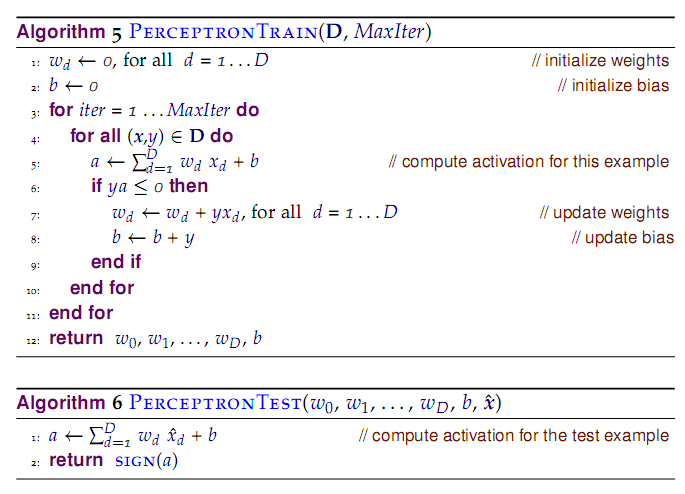

The algorithm is shown in the above image.

In [21]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [22]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

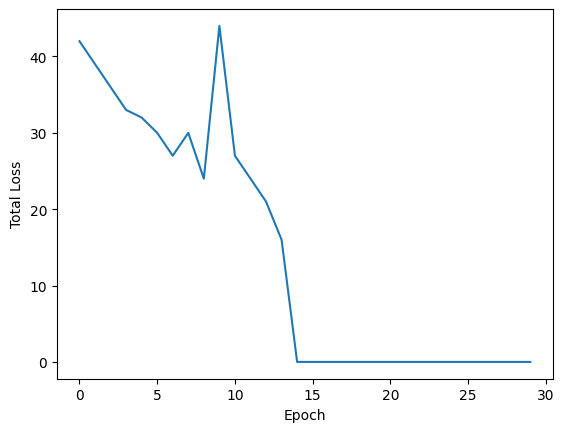

In [23]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

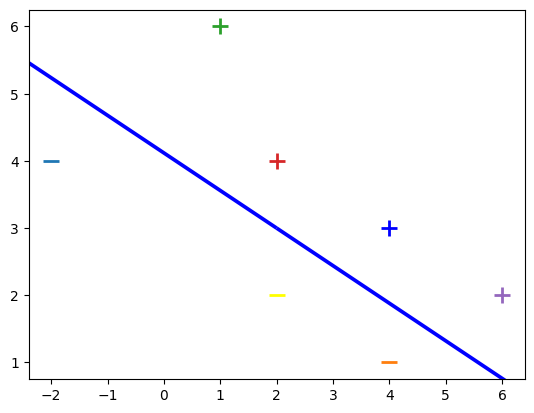

In [24]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Accuracy: 0.956140350877193


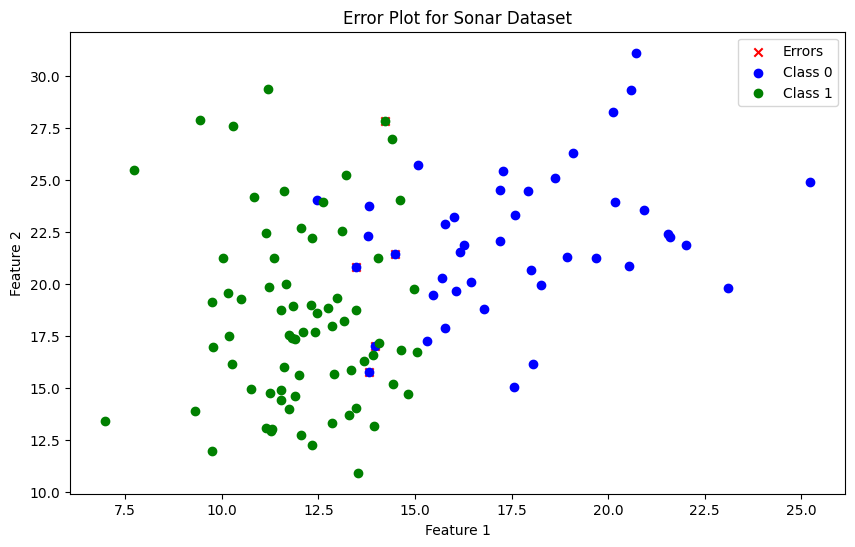

In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Sonar dataset
sonar = datasets.load_breast_cancer()
X = sonar.data
y = sonar.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the errors
errors = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 6))
plt.scatter(X_test[errors, 0], X_test[errors, 1], marker='x', color='red', label='Errors')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='o', color='blue', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='o', color='green', label='Class 1')
plt.title('Error Plot for Sonar Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()







<ipython-input-29-c9460527481d>:40: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-29-c9460527481d>:40: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


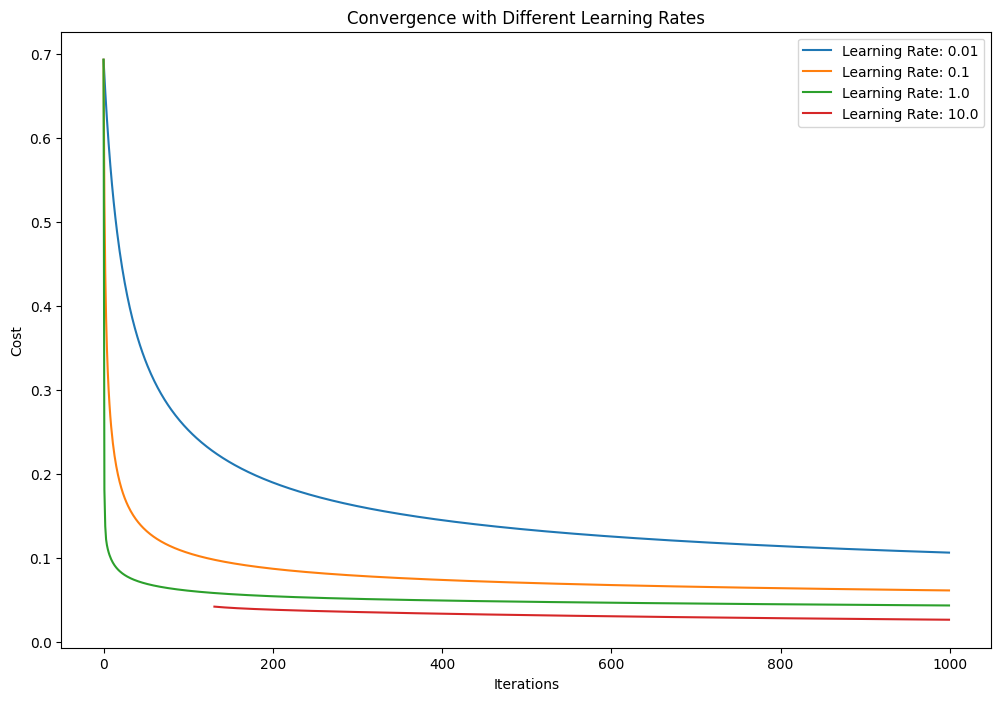

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the gradient descent function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []

    for i in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        error = h - y
        gradient = np.dot(X.T, error) / m
        theta -= learning_rate * gradient

        # Calculate and store the cost
        cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        costs.append(cost)

    return theta, costs

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 1.0, 10.0]
iterations = 1000

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    theta, costs = gradient_descent(X_train, y_train, learning_rate=lr, iterations=iterations)
    plt.plot(costs, label=f'Learning Rate: {lr}')

plt.title('Convergence with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

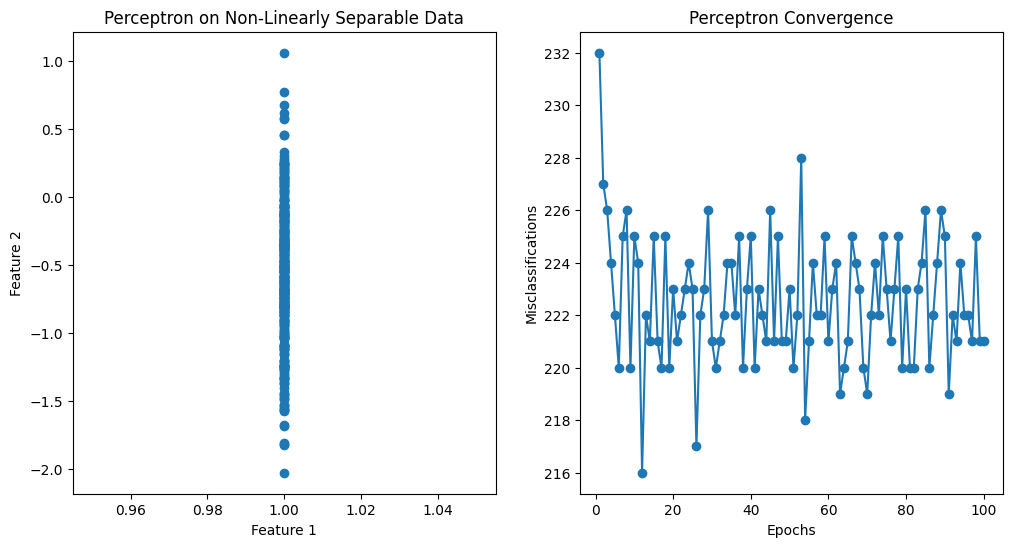

In [30]:
# Perceptron algorithm
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                error += int(update != 0.0)
            self.errors.append(error)

    def predict(self, xi):
        return np.where(np.dot(xi, self.weights) >= 0, 1, -1)

# Train the perceptron on the dataset
perceptron = Perceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

# Plot the decision boundary and errors over iterations
plt.figure(figsize=(12, 6))

# Plot the dataset
plt.subplot(1, 2, 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='x', label='Class -1')
plt.title('Perceptron on Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
plt.subplot(1, 2, 2)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.title('Perceptron Convergence')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')

plt.show()

In [25]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [26]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


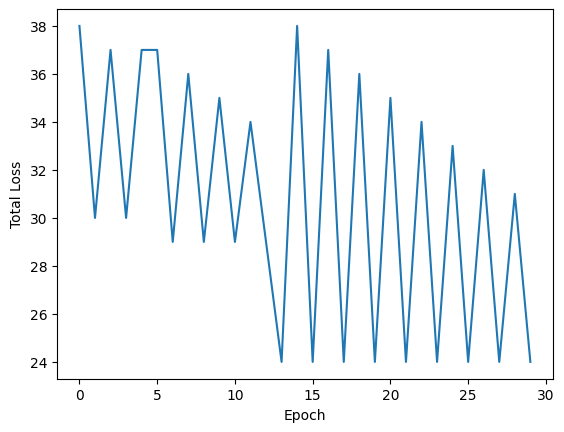

In [27]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.